In [1]:
from sqlalchemy import create_engine
import pandas as pd


username = 'root'
password = '****'
host = 'localhost' 
port = '3306' 
database = '****'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')


query = """
    SELECT 
        YEAR(s.date) AS Year,
        MONTH(s.date) AS Month,
        ROUND(SUM(s.sold_quantity * g.gross_price), 0) AS Gross_sales_Amount
    FROM
        fact_sales_monthly s
        JOIN fact_gross_price g ON s.product_code = g.product_code
        AND s.fiscal_year = g.fiscal_year
        JOIN dim_customer c ON s.customer_code = c.customer_code
    WHERE
        c.customer LIKE '%%Atliq Exclusive%%'
    GROUP BY Year, Month
    ORDER BY Year, Month;
"""

try:

    df = pd.read_sql(query, engine)
    

    print(df)
except Exception as e:
    print(f"An error occurred while executing the query: {e}")
finally:
   
    engine.dispose()


    Year  Month  Gross_sales_Amount
0   2019      9           4496260.0
1   2019     10           5135902.0
2   2019     11           7522893.0
3   2019     12           4830405.0
4   2020      1           4740600.0
5   2020      2           3996228.0
6   2020      3            378771.0
7   2020      4            395035.0
8   2020      5            783813.0
9   2020      6           1695217.0
10  2020      7           2551159.0
11  2020      8           2786648.0
12  2020      9          12353510.0
13  2020     10          13218636.0
14  2020     11          20464999.0
15  2020     12          12944660.0
16  2021      1          12399393.0
17  2021      2          10129736.0
18  2021      3          12144061.0
19  2021      4           7312000.0
20  2021      5          12150225.0
21  2021      6           9824521.0
22  2021      7          12092346.0
23  2021      8           7178708.0


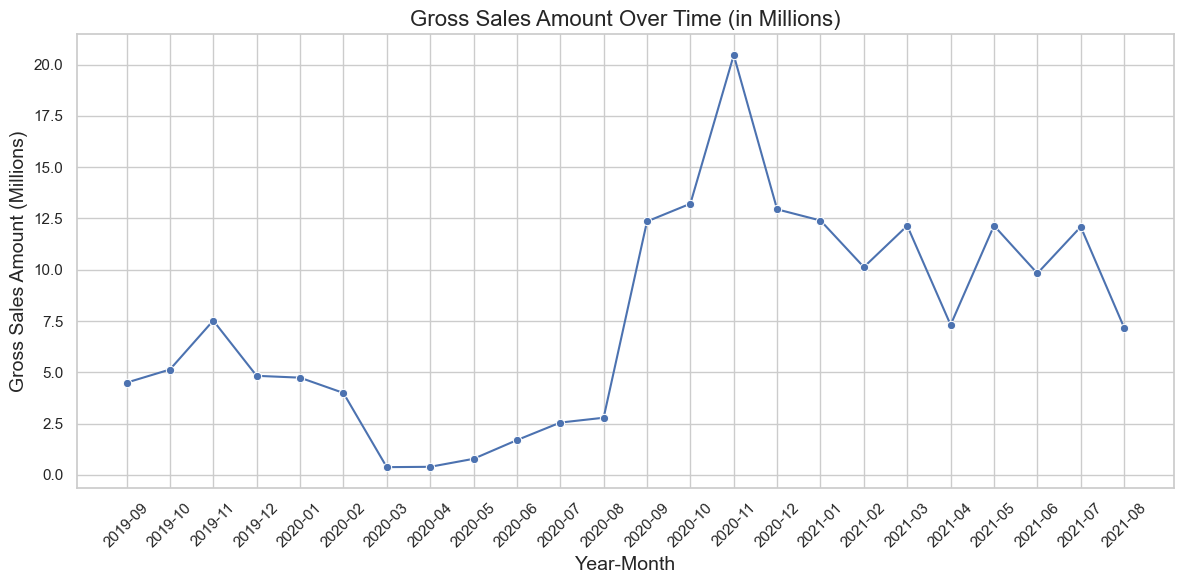

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns



df['Gross_sales_Amount_Millions'] = df['Gross_sales_Amount'] / 1_000_000


df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)


df.sort_values(by=['Year', 'Month'], inplace=True)


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year-Month', y='Gross_sales_Amount_Millions', marker='o')


plt.title('Gross Sales Amount Over Time (in Millions)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Gross Sales Amount (Millions)', fontsize=14)
plt.xticks(rotation=45)  
plt.tight_layout()  


plt.tight_layout()
plt.savefig('gross_sales_over_time.png', dpi=300)  



plt.show()
